<a href="https://colab.research.google.com/github/EstherHadsa/Week7IndependentProject/blob/main/Hypothesis_Testing_Autolib_dataset_Esther_WAweru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
The goal of the project is to investigate a claim about blue cars from the Autolib dataset. I chose to compare the number of blue cars taken by two different postal areas, that is, 75001 and 93260.  I suspect that the average number of blue cars taken, specifically during the weekend, between the two areas is different. 

# Metric for Success
Our project will be considered a success if we are able to perform hypothesis testing and correctly either reject the Null hypothesis or fail to reject the Null hypothesis

#Research Context
Our data was got from the Autolib Electric car sharing service company in France. Our data is between the period January 2018 and July 2018. The company has 3 types of electric cars , Blue cars , Utilib cars and Utilib 1.4 cars. The company was particularly interested in the blue cars assuming they were very popular.

#Experimental design
Below are the steps to be taken to make this project a success
1. Load data and preview preliminary characteristics of the dataset
2. Data Cleaning (check for and deal with outliers, messy column names, values and missing data)
3. Univariate Analysis
4. Bivariate Analysis
5. Implementing the Solution by performing Hypothesis Testing i.e. 

  *   State the null and alternate hypothesis 
  *   Set the significance level
  *   Calculate Test statistic and corresponding p-value
  * Make appropriate conclusions from the results




6. Challenging the Solution by providing insights on how you can make improvements.

#Data Validity
The data is valid and useful in our analysis as it contains the necessary variables needed.

**UNDERSTANDING OUR DATA**

Our dataset has 13 columns:


1.  Postal code :	postal code of the area (in Paris)
2. date:	date of the row aggregation
3. n_daily_data_points:	number of daily data poinst that were available for aggregation, that day
4. dayofweek:	identifier of weekday (0: Monday -> 6: Sunday)
5. day_type:	weekday or weekend
6. bluecars_taken_sum:	Number of bluecars taken that date in that area
7. bluecars_returned_sum:	Number of bluecars returned that date in that area
8. Utilib_taken_sum:	Number of Utilib taken that date in that area
9. Utilib_returned_sum:	Number of Utilib returned that date in that area
10. Utilib_14_taken_sum:	Number of Utilib 1.4 taken that date in that area
11. Utilib_14_returned_sum:	Number of Utilib 1.4 returned that date in that area
12. Slots_freed_sum:	Number of recharging slots released that date in that area
13. Slots_taken_sum:	Number of rechargign slots taken that date in that area

  

In [47]:
#Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#Load our data
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
print(df.shape)
#Check first five records
df.head()

(16085, 13)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [49]:
#Check last five records
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [50]:
#Check for unique values
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [51]:
#Check on data types 
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [52]:
#Change datatype of date from object to date
df['date'] = df['date'].astype('datetime64')
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [53]:
print(df['date'].max().date())
print(df['date'].min().date())

#Our data was collected from January 2018 to June 2018

2018-06-19
2018-01-01


In [54]:
#Description of data
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


**Cleaning of Data**


In [55]:
#Fix messy column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [56]:
#Check for missing values
df.isnull().sum()

#There are no missing values.

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [57]:
#Drop columns not needed in our analysis
df.drop(['n_daily_data_points','utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum',
        'slots_freed_sum','slots_taken_sum'],axis = 1,inplace = True)
df.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,2018-01-01,0,weekday,110,103
1,75001,2018-01-02,1,weekday,98,94
2,75001,2018-01-03,2,weekday,138,139
3,75001,2018-01-04,3,weekday,104,104
4,75001,2018-01-05,4,weekday,114,117


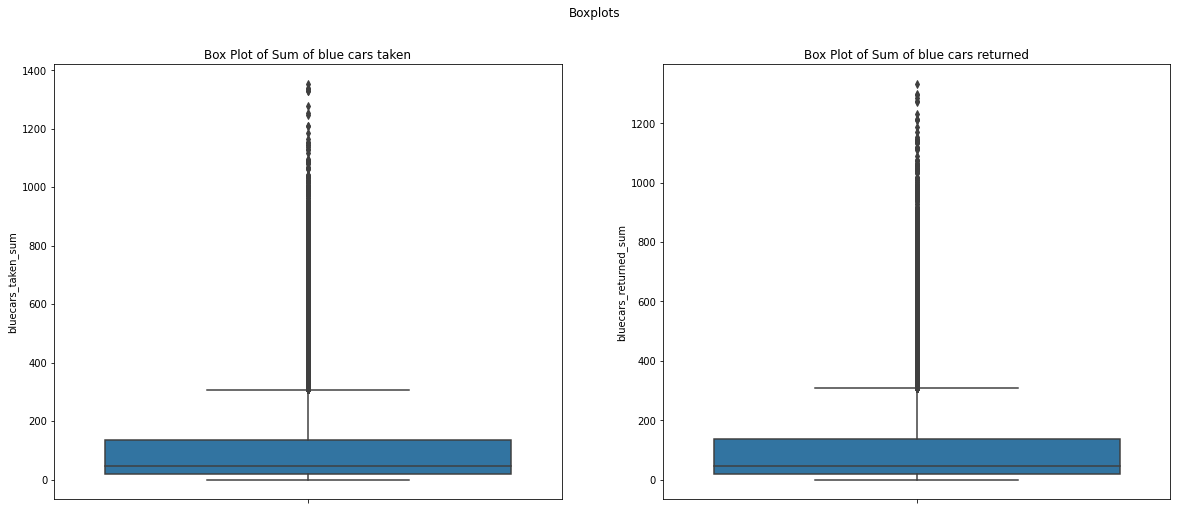

In [58]:
#Check for outliers
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y = "bluecars_taken_sum", ax=ax[0])
ax[0].set_title('Box Plot of Sum of blue cars taken')
sns.boxplot(data=df, y = "bluecars_returned_sum", ax=ax[1])
ax[1].set_title('Box Plot of Sum of blue cars returned')

plt.show()

#As there's no sufficient evidence to show whether these outliers are errors , we chose
#not to delete them.  

In [87]:
#check for duplicate values
df.duplicated().sum()

0

# EDA PROCESS


1. **UNIVARIATE ANALYSIS**




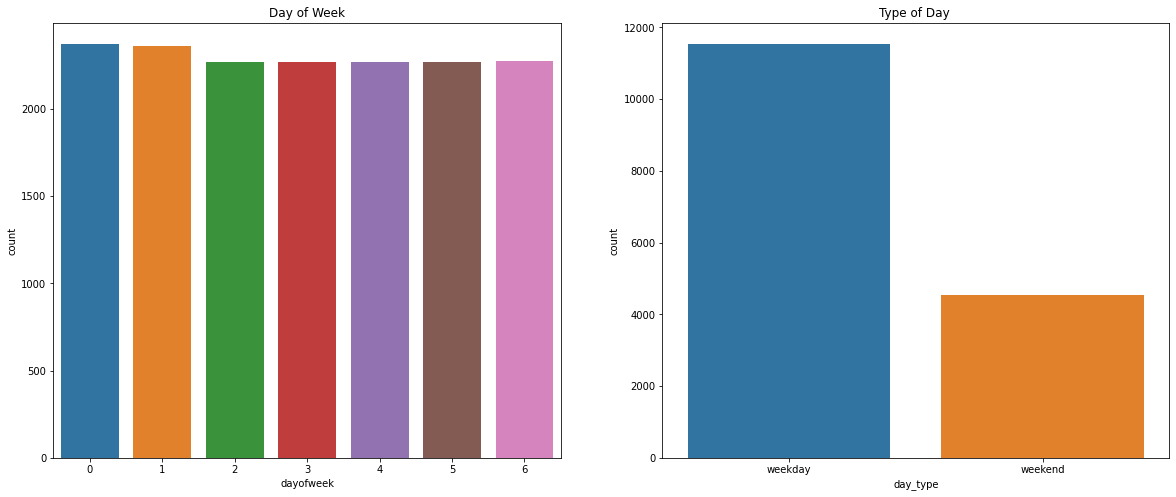

In [59]:
#
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(data=df, x = "dayofweek", ax=ax[0])
ax[0].set_title('Day of Week')
sns.countplot(data=df, x = "day_type", ax=ax[1])
ax[1].set_title('Type of Day ')

plt.show()

#We can see that more data points were collected on weekdays.
#Data during the week is almost evenly distributed

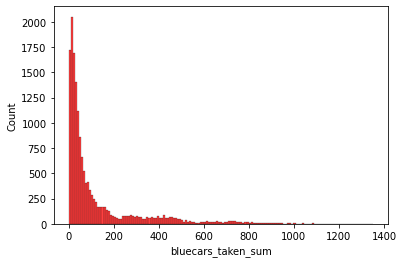

In [60]:
#Distribution of numerical variables
#Plot a histogram
sns.histplot(df['bluecars_taken_sum'],color = 'Red')

#Data is skewed to the right

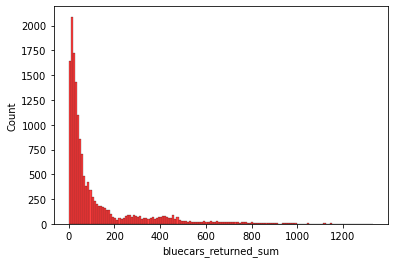

In [61]:
sns.histplot(df['bluecars_returned_sum'],color = 'Red')

#Data is skewed to the right.

Measure of Central Tendency 

In [62]:
#BlueCarsTaken
#Mean
Btaken_mean = df['bluecars_taken_sum'].mean()
print('The mean of Blue cars taken is ',Btaken_mean)

#Mode
Btaken_mode = df['bluecars_taken_sum'].mode()
print('The mode of Blue cars taken is ',Btaken_mode)

#Median
Btaken_median = df['bluecars_taken_sum'].median()
print('The median of Blue cars taken is ',Btaken_median)


The mean of Blue cars taken is  125.92695057506994
The mode of Blue cars taken is  0    12
dtype: int64
The median of Blue cars taken is  46.0


In [63]:
#BlueCarsReturned
#Mean
Breturn_mean = df['bluecars_returned_sum'].mean()
print('The mean of Blue cars returned is ',Breturn_mean)

#Mode
Breturn_mode = df['bluecars_returned_sum'].mode()
print('The mode of Blue cars returned is ',Breturn_mode)

#Median
Breturn_median = df['bluecars_returned_sum'].median()
print('The median of Blue cars returned is ',Breturn_median)

The mean of Blue cars returned is  125.912713708424
The mode of Blue cars returned is  0    13
dtype: int64
The median of Blue cars returned is  46.0


Measure of dispersion

In [64]:
#Blue cars taken
#Standard deviation
Btaken_std = df['bluecars_taken_sum'].std()
print('The standard deviation of Blue cars taken is ',Btaken_std)

#Variance
Btaken_var = df['bluecars_taken_sum'].var()
print('The variance of Blue cars taken is ',Btaken_var)

#Range
Btaken_max = df['bluecars_taken_sum'].max()
Btaken_min = df['bluecars_taken_sum'].min()
Btaken_range = Btaken_max - Btaken_min
print('The Range of Blue cars taken is ',Btaken_range)

#Interquartile Range
from scipy.stats import iqr
Btaken_iqr = iqr(df['bluecars_taken_sum'])
print('The Interquartile Range of Blue cars taken is ',Btaken_iqr)

#Skewness
Btaken_skew = df['bluecars_taken_sum'].skew()
print('The Skewness of Blue cars taken is ',Btaken_skew)
#Distribution is skewed to right since Skewness is positive 

#Kurtosis
Btaken_kurt = df['bluecars_taken_sum'].kurt()
print('The Kurtosis of Blue cars taken is ',Btaken_kurt)
#Since Kurtosis is greater than zero it means it's heavy tailed hence outliers are present
print('\n-----------------------------------------------------------------------------\n')

#Put it all together
df['bluecars_taken_sum'].describe()


The standard deviation of Blue cars taken is  185.42657876727893
The variance of Blue cars taken is  34383.01611333789
The Range of Blue cars taken is  1352
The Interquartile Range of Blue cars taken is  115.0
The Skewness of Blue cars taken is  2.4063548974959086
The Kurtosis of Blue cars taken is  6.172692305510042

-----------------------------------------------------------------------------



count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: bluecars_taken_sum, dtype: float64

In [65]:
#Blue Cars Returned
#Standard deviation
BReturn_std = df['bluecars_returned_sum'].std()
print('The standard deviation of Blue cars returned is ',BReturn_std)

#Variance
BReturn_var = df['bluecars_returned_sum'].var()
print('The variance of Blue cars returned is ',BReturn_var)

#Range
BReturn_max = df['bluecars_returned_sum'].max()
BReturn_min = df['bluecars_returned_sum'].min()
BReturn_range = BReturn_max - BReturn_min
print('The Range of Blue cars returned is ',BReturn_range)

#Interquartile Range
from scipy.stats import iqr
BReturn_iqr = iqr(df['bluecars_returned_sum'])
print('The Interquartile Range of Blue cars returned is ',BReturn_iqr)

#Skewness
BReturn_skew = df['bluecars_returned_sum'].skew()
print('The Skewness of Blue cars returned is ',BReturn_skew)
#Distribution is skewd to right
#Kurtosis
BReturn_kurt = df['bluecars_returned_sum'].kurt()
print('The Kurtosis of Blue cars returned is ',BReturn_kurt)
#Distribution is heavy tailed.
print('\n-----------------------------------------------------------------------------\n')
#Put it all together
df['bluecars_returned_sum'].describe()

The standard deviation of Blue cars returned is  185.50153480148427
The variance of Blue cars returned is  34410.819413706275
The Range of Blue cars returned is  1332
The Interquartile Range of Blue cars returned is  115.0
The Skewness of Blue cars returned is  2.412084978838923
The Kurtosis of Blue cars returned is  6.1862880957582345

-----------------------------------------------------------------------------



count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: bluecars_returned_sum, dtype: float64

Findings during univariate analysis:


1.   More data points were collected during weekdays compared to the weekend
2.   Cars borrowed during the week were evenly distributed.
3. Distribution of blue cars taken is skewed to the right.
4. The mean of Blue cars taken is 125, mode is 12 and median is 46.
5. Distribution of blue cars returned is skewed to right.
6. The mean of Blue cars returned is 125 , mode is 13 and median is 46.





**Bivariate analysis**

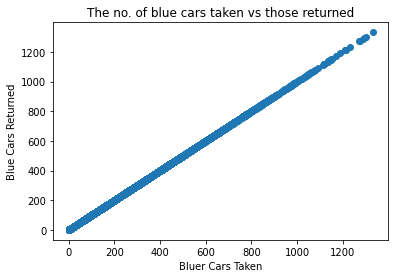

The correlation between cars returned and those taken is  0.9986597051672199


In [66]:
#Compare the number of cars returned vs the ones returned.
x = df['bluecars_returned_sum']
y = df['bluecars_returned_sum']

plt.scatter(x,y)
plt.xlabel('Bluer Cars Taken')
plt.ylabel('Blue Cars Returned')
plt.title('The no. of blue cars taken vs those returned')
plt.show()

#From the graph we can see the number of cars taken and returned have
#a positive linear relationship and are correlated.

corr = df['bluecars_taken_sum'].corr(df['bluecars_returned_sum'])
print('The correlation between cars returned and those taken is ', corr)

<function matplotlib.pyplot.show>

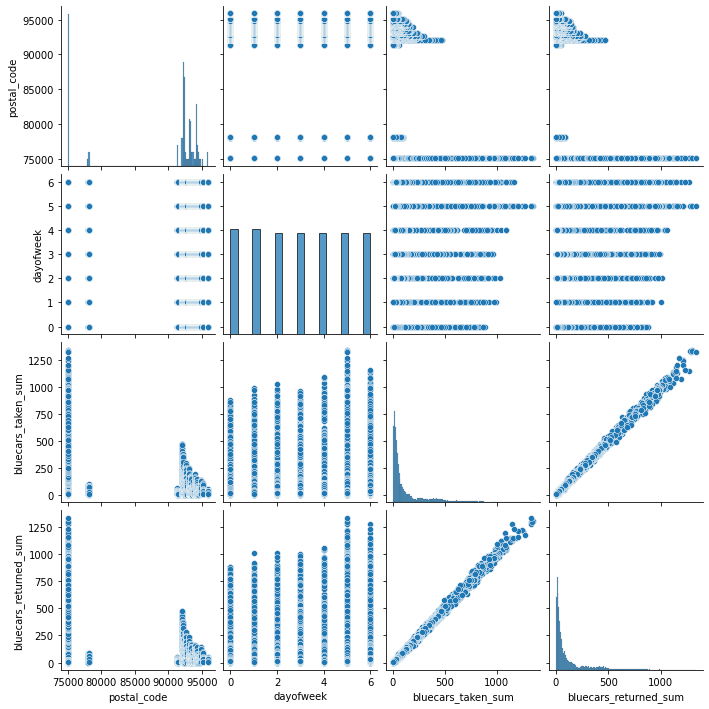

In [67]:
#Pairplot
sns.pairplot(df)
plt.show

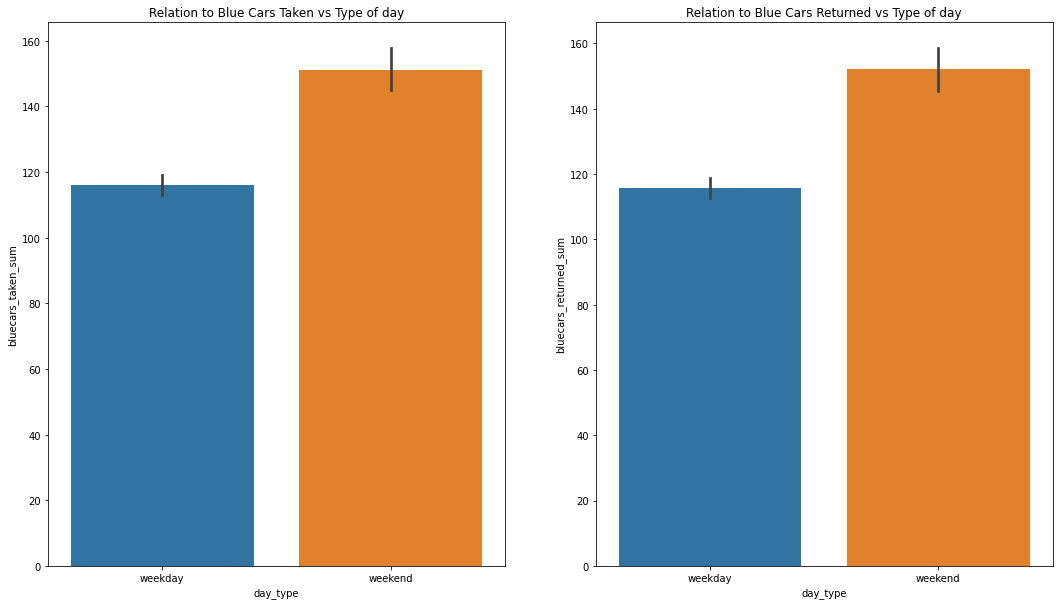

In [68]:
#Compare the no. of cars taken and returned during weekdays and weekend

fig,ax=plt.subplots(1,2,figsize=(18,10))

sns.barplot(y = df['bluecars_taken_sum'] ,x =df['day_type'],data=df,ax=ax[0])
ax[0].set_title('Relation to Blue Cars Taken vs Type of day')

sns.barplot(y=df['bluecars_returned_sum'],x = df['day_type'],data=df,ax=ax[1])
ax[1].set_title('Relation to Blue Cars Returned vs Type of day')

plt.show()

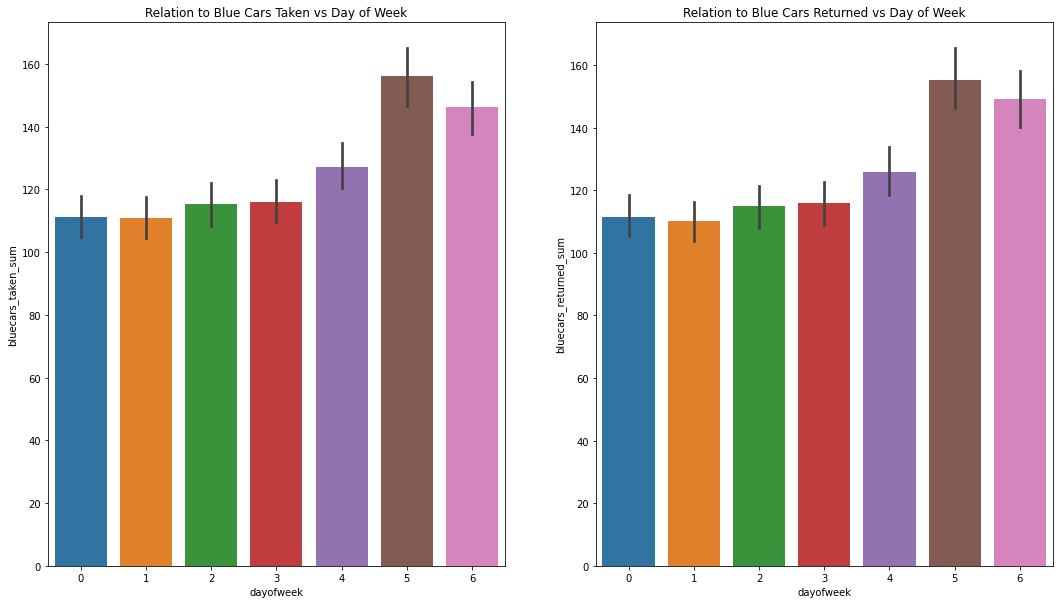

In [90]:
#Compare the no. of cars taken and returned during the week
fig,ax=plt.subplots(1,2,figsize=(18,10))

sns.barplot(y = df['bluecars_taken_sum'] ,x =df['dayofweek'],data=df,ax=ax[0])
ax[0].set_title('Relation to Blue Cars Taken vs Day of Week')

sns.barplot(y=df['bluecars_returned_sum'],x = df['dayofweek'],data=df,ax=ax[1])
ax[1].set_title('Relation to Blue Cars Returned vs Day of Week')

plt.show()

In [89]:
df['dayofweek'].corr(df['bluecars_returned_sum'])

0.08195445794154745

Bivariate analysis findings:


1.   Blue cars taken and Blue Cars Returned are positively related.
2.   Cars taken and returned during the week were mostly fairly distrubuted but significantly higher on Saturday.
3.  Blue Cars Returned and Taken were significantly higher during the weekend 



# **HYPOTHESIS TESTING**

Stating our NUll and ALternate Hypothesis:

***Null Hypothesis***:

Is the average number of blue cars taken during the weekend for area 75001 equal to that of area code 93260 at 0.05 significance level?

	H0: µ1 = µ2 at α = 0.05
***Alternate Hypothesis:***

Is the average number of blue cars taken during the weekend for area 75001 not equal to that of area code 93260 at 0.05 significance level?

	Ha: µ1 ≠ µ2 at α = 0.05


In [115]:
#Since our hypothesis will be dealing with Average of blue cars taken during the weekend for
#area code 75001 and 93260, we create a dataframe with this information

df_area1 = df.loc[df['postal_code'].isin([75001]) & df['day_type'].isin(['weekend'])]
df_area1.head()


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
5,75001,2018-01-06,5,weekend,187,185
6,75001,2018-01-07,6,weekend,180,180
12,75001,2018-01-13,5,weekend,224,223
13,75001,2018-01-14,6,weekend,193,193
19,75001,2018-01-20,5,weekend,217,217


In [72]:
df_area2 = df.loc[df['postal_code'].isin([93260]) & df['day_type'].isin(['weekend'])]
df_area2.head()

,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
11029,93260,2018-01-06,5,weekend,56,49
11030,93260,2018-01-07,6,weekend,39,52
11036,93260,2018-01-13,5,weekend,61,58
11037,93260,2018-01-14,6,weekend,57,54
11043,93260,2018-01-20,5,weekend,70,69


In [73]:
df_area1.shape
#Our data has 44 rows and 6 columns

df_area1.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,44.0,44.000000,44.000000,44.000000
mean,75001.0,5.500000,178.727273,179.522727
std,0.0,0.505781,39.030914,38.798519
min,75001.0,5.000000,8.000000,9.000000
25%,75001.0,5.000000,159.750000,163.500000
50%,75001.0,5.500000,185.500000,182.500000
75%,75001.0,6.000000,199.750000,203.250000
max,75001.0,6.000000,254.000000,253.000000


In [74]:
df_area2.shape
#Our data has 44 rows and 6 columns

df_area2.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,44.0,44.000000,44.000000,44.000000
mean,93260.0,5.500000,56.704545,56.409091
std,0.0,0.505781,12.233350,11.556370
min,93260.0,5.000000,4.000000,5.000000
25%,93260.0,5.000000,50.750000,51.750000
50%,93260.0,5.500000,58.000000,55.000000
75%,93260.0,6.000000,62.250000,63.250000
max,93260.0,6.000000,81.000000,77.000000


In [122]:
#Sampling
#I chose Simple Random Sampling as it is
#easier to implement and is also free from bias.
#I chose my sampling size to 50 % of our data

df_sample1 = df_area1.sample(frac= 0.5, replace = 'False')
print(df_sample1.shape)
#Our sample has 22 rows and 6 columns
df_sample1.head()


(22, 6)


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
121,75001,2018-05-05,5,weekend,207,207
122,75001,2018-05-06,6,weekend,152,155
27,75001,2018-01-28,6,weekend,190,189
146,75001,2018-06-10,6,weekend,146,146
72,75001,2018-03-17,5,weekend,197,203


In [123]:
df_sample2 = df_area2.sample(frac= 0.5, replace = 'False')
print(df_sample2.shape)
#Our sample has 22 rows and 6 columns
df_sample2.head()

(22, 6)


,postal_code,date,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
11162,93260,2018-06-02,5,weekend,81,74
11083,93260,2018-03-04,6,weekend,59,58
11118,93260,2018-04-08,6,weekend,49,54
11125,93260,2018-04-15,6,weekend,50,52
11096,93260,2018-03-17,5,weekend,50,48


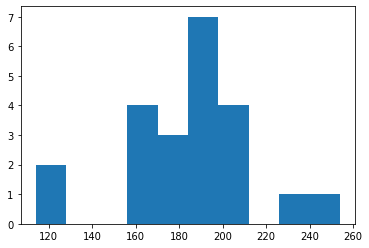

In [77]:
#Test for Normality
#Using histogram
plt.hist(df_sample1['bluecars_taken_sum'])
plt.show()

#The distribution almost has a gaussian-like shape.
#it may not be perfect due to presence of outliers.

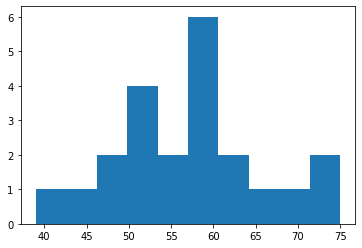

In [78]:
#Test for Normality
#Using histogram
plt.hist(df_sample2['bluecars_taken_sum'])
plt.show()

#The distribution almost has a gaussian-like shape.
#it may not be perfect due to presence of outliers.

In [79]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat,p = shapiro(df_sample1['bluecars_taken_sum'])

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
 #Our sample looks like a normal distribution.
 #We can assume normality and since n < 30 ,
 #We can use the T-test

Sample looks Gaussian


In [80]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
stat,p = shapiro(df_sample2['bluecars_taken_sum'])

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
 #Our sample looks like a normal distribution.
 #We can assume normality and since n < 30 ,
 #We can use the 2 sample T-test

Sample looks Gaussian


In [124]:
#Check variance of the 2 samples
print(df_sample1['bluecars_taken_sum'].var())
print(df_sample2['bluecars_taken_sum'].var())

#Our sample have an unequal variance

1024.8225108225108
73.10822510822511


In [100]:
#Check mean of the two samples
print(df_sample1['bluecars_taken_sum'].mean())
print(df_sample2['bluecars_taken_sum'].mean())


182.95454545454547
57.13636363636363


In [125]:
from scipy import stats

t_value,p_value=stats.ttest_ind(df_sample1['bluecars_taken_sum'],df_sample2['bluecars_taken_sum'],equal_var= False)

print('Test statistic is: ',float("{:.6f}".format(t_value)))

print('p-value for two tailed test is %f'%p_value)

#Significance value
alpha = 0.05

#Interpretation
if p_value<=alpha:

    print('Conclusion',':\n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. So we conclude that the 

average no. of blue cars taken is not equal in the two areas i.e., μ1 ≠  μ2 at %.2f level of significance.'''%alpha)

else:
  print('Conclusion',':\n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We fail to reject the null hypothesis H0. So we conclude that the 

average no. of blue cars taken is equal in the two areas i.e., μ1 = μ2 at %.2f level of significance.'''%alpha)

Test statistic is:  15.377973
p-value for two tailed test is 0.000000
Conclusion :
 Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0. So we conclude that the 

average no. of blue cars taken is not equal in the two areas i.e., μ1 ≠  μ2 at 0.05 level of significance.


In [126]:
#Check Power of Test
#The statistical power of a hypothesis test is the probability of 
#correctly rejecting a null hypothesis or the likeliness of accepting the alternative hypothesis if it is true. 
#So, the higher the statistical power for a given test, the lower the probability of making a Type II (false negative) error. 

# import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower
  
#calculation of effect size
# size of samples in 
n1, n2 = 22, 22
  
# variance of samples in pilot study
s1, s2 = 941.1883116883115, 80.12337662337661
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
  
# means of the samples
u1, u2 = 182.95454545454547,57.13636363636363
  
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')
  
# factors for power analysis
alpha = 0.05

  
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(nobs1 = n1 ,effect_size=d, alpha=alpha, power=None, 
                    ratio=1, alternative='two-sided')
  
print('The power of test is : ',format(n))

#This is through the help of https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/ 
#and https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.solve_power.html

Effect size: 5.5677439118337935
The power of test is :  1.0


**Point Estimation**

In [127]:
#Check how far the estimated mean differs from the main mean for area 75001
pop1_mean = df_area1['bluecars_taken_sum'].mean()
print(pop1_mean)

sample1_mean = df_sample1['bluecars_taken_sum'].mean()
print(sample1_mean)

#how much the estimated mean differs from the main mean
pop1_mean - sample1_mean

#From this we can say our sample mean underestimates the true mean by -4.2272

178.72727272727272
167.8181818181818


10.909090909090907

In [128]:
#Check how far the estimated mean differs from the main mean for area 93260
pop2_mean = df_area2['bluecars_taken_sum'].mean()
print(pop2_mean)

sample2_mean = df_sample2['bluecars_taken_sum'].mean()
print(sample2_mean)

#how much the estimated mean differs from the main mean
pop2_mean - sample2_mean

#From this we can say our sample mean underestimates the true mean by -0.4318

56.70454545454545
59.18181818181818


-2.4772727272727266

**Interval Estimation**

In [129]:
#sample size
sample1_size = len(df_sample1)
sample1_size

#standard error
std_error = df_sample1['bluecars_taken_sum'].std()/np.sqrt(sample1_size)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample1_mean, scale=std_error)

# We can be 95% certain that the population mean data for area 75001 is between 170.13 and 195.77

(154.4411093808749, 181.19525425548872)

In [130]:
#sample size
sample2_size = len(df_sample2)
sample2_size

#standard error
std_error = df_sample2['bluecars_taken_sum'].std()/np.sqrt(sample2_size)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample2_mean, scale=std_error)

# We can be 95% certain that the population mean data for area 93260 is between 53.39 and 60.876

(55.60892632909717, 62.75471003453919)